# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
up=files.upload()
up.keys()

Saving 50_Startups.csv to 50_Startups.csv
Saving proble_statement(50_startups).txt to proble_statement(50_startups).txt


dict_keys(['50_Startups.csv', 'proble_statement(50_startups).txt'])

In [3]:
f=open('proble_statement(50_startups).txt','r')
f.readlines()

['Prepare a prediction model for profit of 50_startups data.\n',
 'Do transformations for getting better predictions of profit and\n',
 'make a table containing R^2 value for each prepared model.\n',
 '\n',
 'R&D Spend -- Research and devolop spend in the past few years\n',
 'Administration -- spend on administration in the past few years\n',
 'Marketing Spend -- spend on Marketing in the past few years\n',
 'State -- states from which data is collected\n',
 'Profit  -- profit of each state in the past few years\n']

In [4]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [5]:
data.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)

In [6]:
data.shape

(50, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.duplicated().sum()

0

In [10]:
#checking any columns got zeroes
(data==0).any()

RD_Spend            True
Administration     False
Marketing_Spend     True
State              False
Profit             False
dtype: bool

In [11]:
# data containing zero
data[(data==0).any(axis=1)]

,RD_Spend,Administration,Marketing_Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [12]:
data.nunique()

RD_Spend           49
Administration     50
Marketing_Spend    48
State               3
Profit             50
dtype: int64

In [13]:
categorical=[i for i  in data if data[i].nunique()<7]
numerical=[i for i in data if i not in categorical]

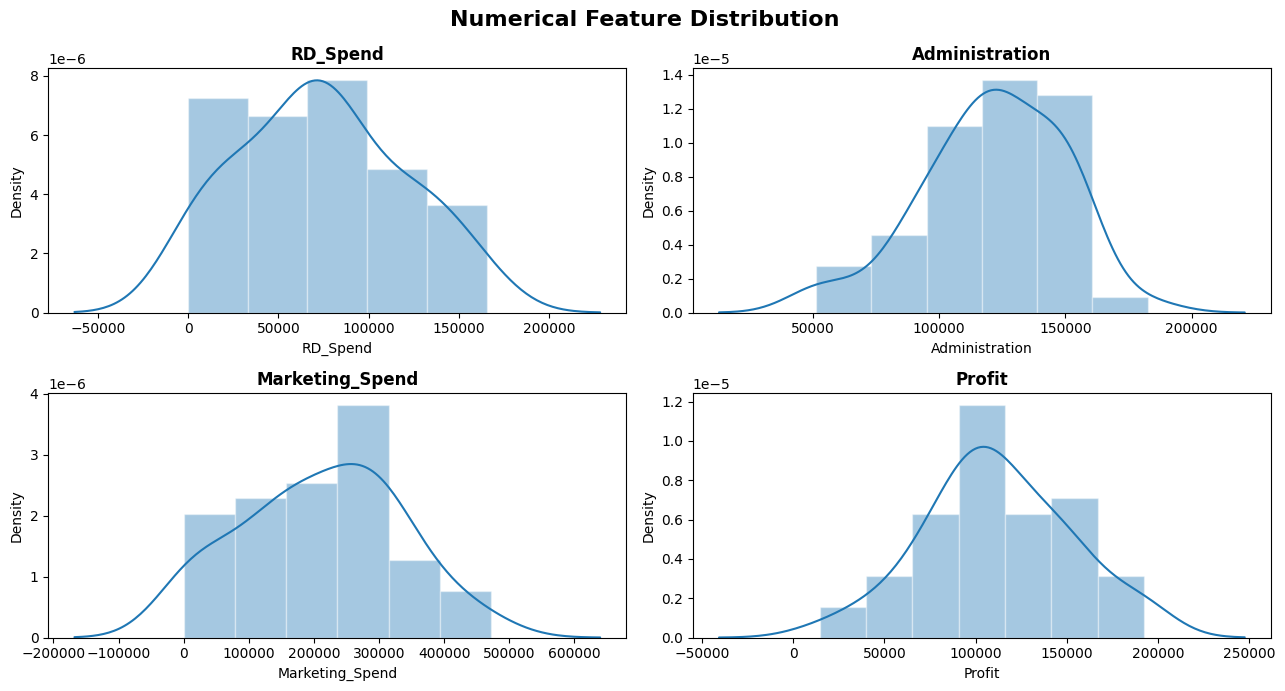

In [14]:
df=data.drop(["State"],axis=1).columns
fig,ax=plt.subplots(2,2,figsize=(13,7))
plt.suptitle("Numerical Feature Distribution",fontweight="bold",fontsize=16)
axs=ax.ravel()
sns.set_style("dark")
for j,i in enumerate(df):
    plt.title("ll")
    sns.distplot(data[i],ax=axs[j]);
    axs[j].set_title(i,fontweight='bold')
plt.tight_layout();

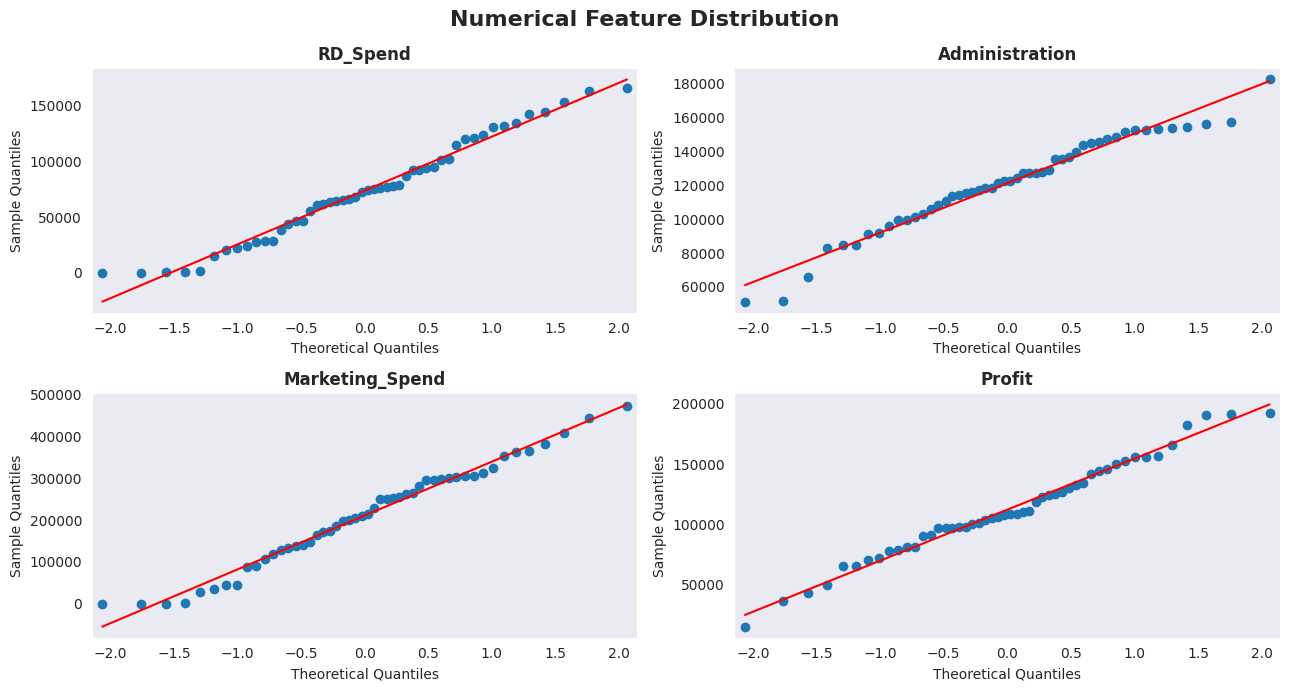

In [15]:
df=data.drop(["State"],axis=1).columns
fig,ax=plt.subplots(2,2,figsize=(13,7))
plt.suptitle("Numerical Feature Distribution",fontweight="bold",fontsize=16)
axs=ax.ravel()
sns.set_style("dark")
for j,i in enumerate(df):
    plt.title("ll")
    sm.qqplot(data[i],ax=axs[j],line="r");
    axs[j].set_title(i,fontweight='bold')
plt.tight_layout();

Text(0.5, 1.0, 'State Count')

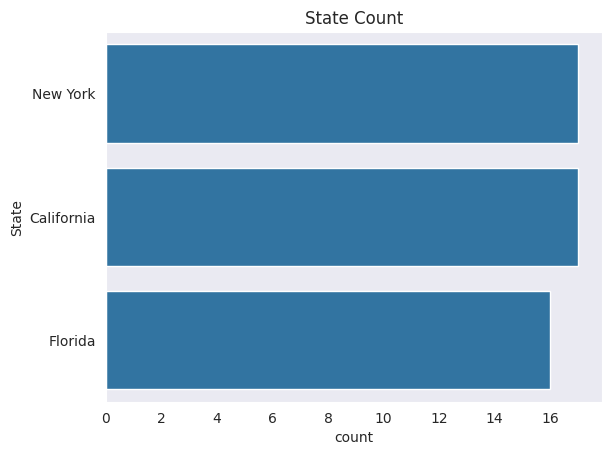

In [16]:
sns.countplot(data.State);
plt.title("State Count")

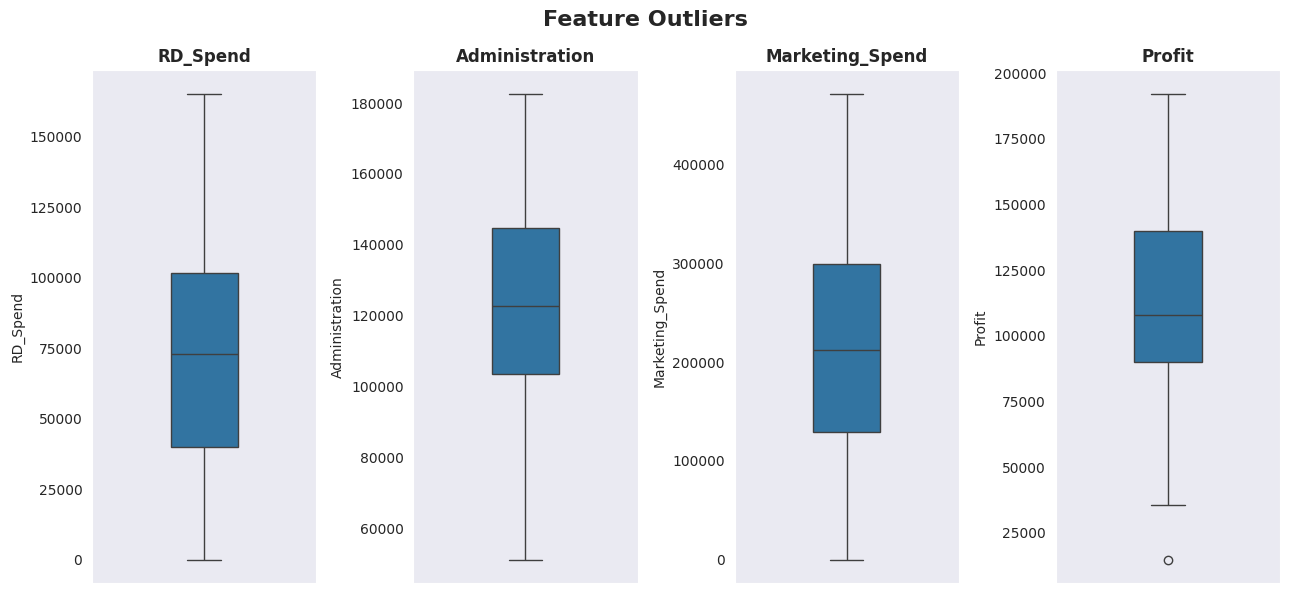

In [17]:
df=data.drop(["State"],axis=1).columns
fig,ax=plt.subplots(1,4,figsize=(13,6))
plt.suptitle("Feature Outliers",fontweight="bold",fontsize=16)
axs=ax.ravel()
sns.set_style("dark")
for j,i in enumerate(df):
    plt.title("ll")
    sns.boxplot(data[i],ax=axs[j],width=.3);
    axs[j].set_title(i,fontweight='bold')
plt.tight_layout();

### ----> There is outlier in Profit

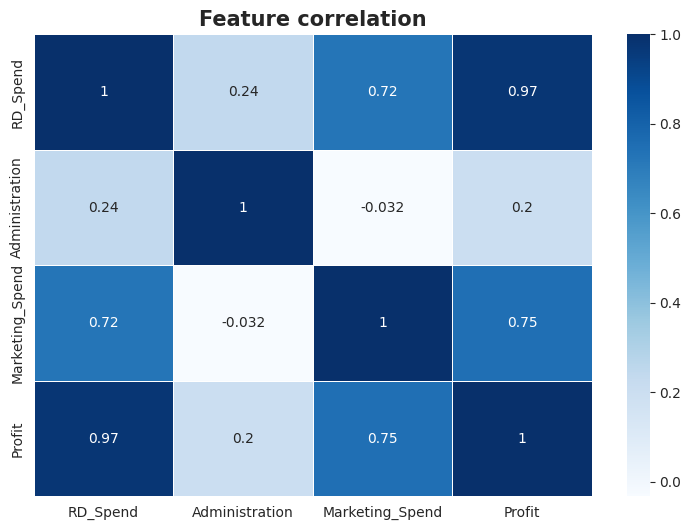

In [18]:
plt.figure(figsize=(9,6))
plt.title("Feature correlation",fontweight='bold',fontsize=15)
sns.heatmap(data.corr(),annot=True,linewidths=.5,cmap="Blues");

## **Relation between target varible and feature**

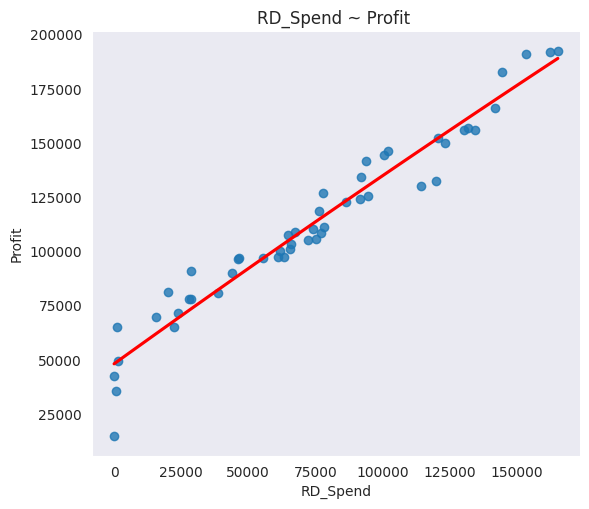

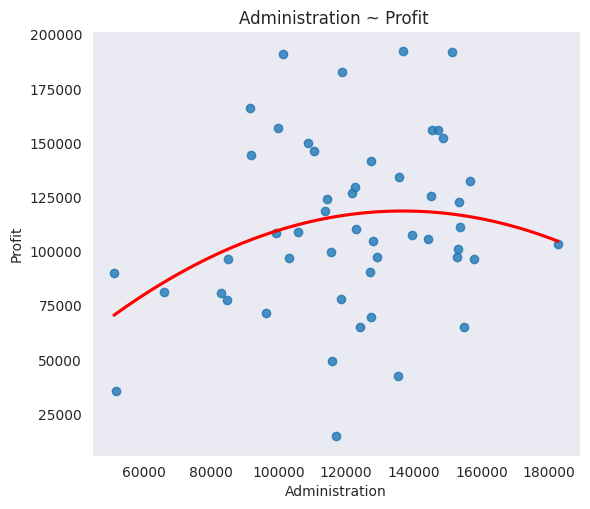

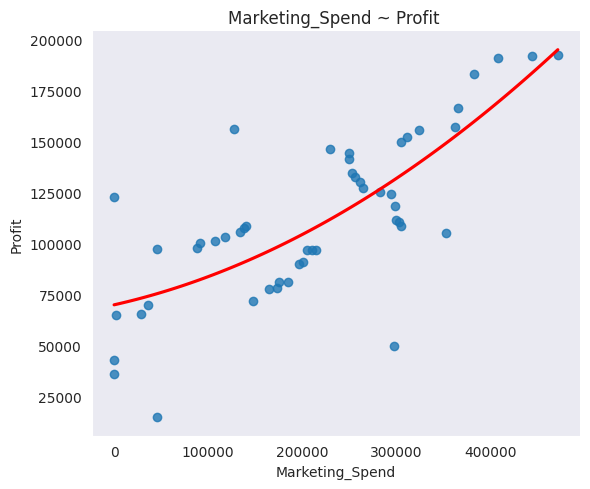

In [19]:
#numerical feature vs target
for i in data.drop(["State",'Profit'],axis=1):
    sns.lmplot(data,x=i,y='Profit',ci=None,order=2,line_kws=dict(color='red'),aspect=1.2,height=5)
    plt.gca().set_title(i+" ~ Profit ")

plt.tight_layout()

### --> Conclusion


*   R&D spend and Profit have strong relation
*   Marketing_spend and progit have also good relation
*   Administration and profit having weak relation




<Axes: xlabel='State'>

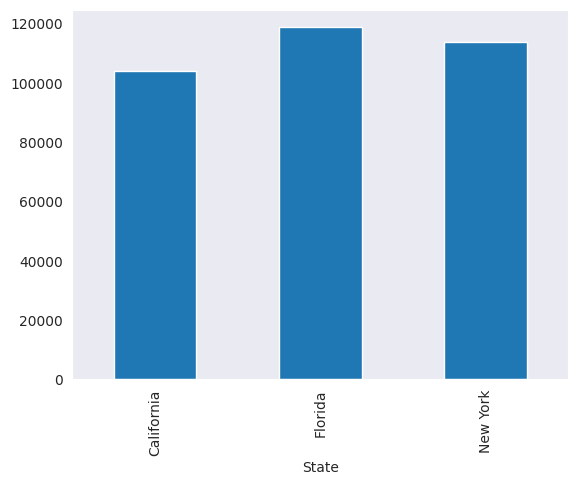

In [20]:
# categorical vs target
data.groupby('State')['Profit'].mean().plot.bar()

### ---> There is no change in profit corresponding  to  each state

# **Handling zeroes**

In [21]:
#Before  transformation of data we have to deal the data with zeroes
data[(data==0).any(axis=1)]

,RD_Spend,Administration,Marketing_Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## **1) Replacing zeroes with median**



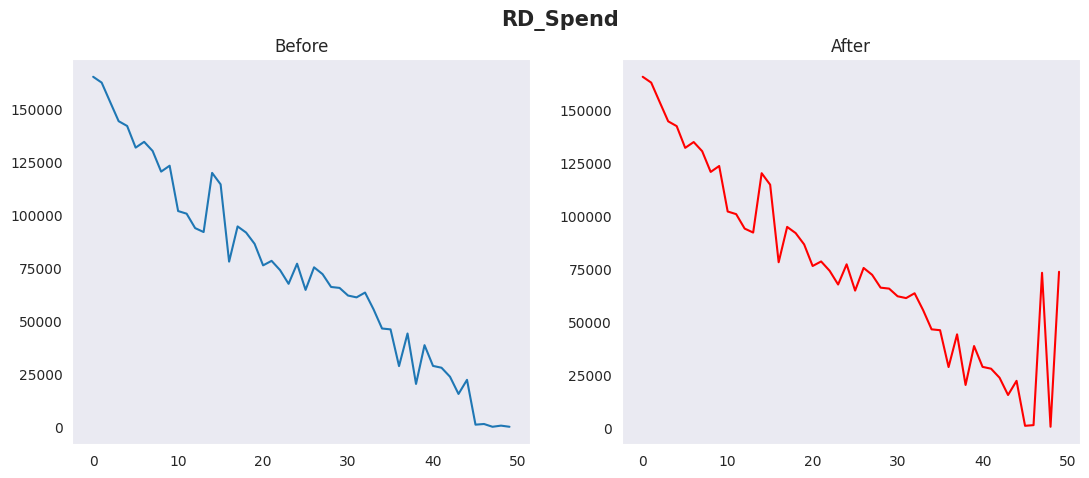

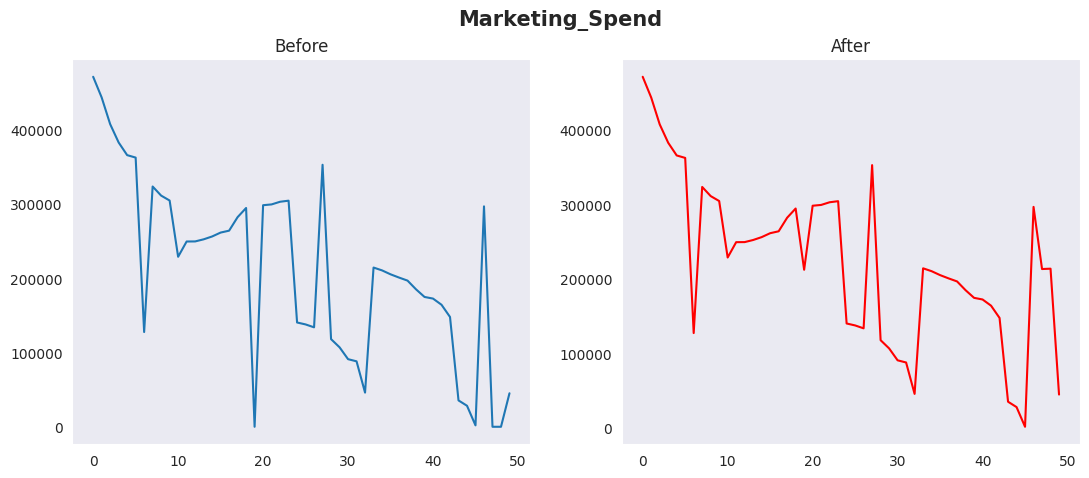

In [22]:
df=data.copy()
for i in df[df.RD_Spend==0].index:
    df.RD_Spend.iloc[i]=df.RD_Spend.median()
for i in df[df.Marketing_Spend==0].index:
    df.Marketing_Spend.iloc[i]=df.Marketing_Spend.median()
for i in ['RD_Spend','Marketing_Spend']:
    plt.subplots(1,2,figsize=(13,5))
    plt.suptitle(i,fontweight='bold',fontsize=15)
    plt.subplot(1,2,1)
    plt.title("Before")
    data[i].plot()
    plt.subplot(1,2,2)
    plt.title("After")
    df[i].plot(color="red")
median_imputed_df=df

## **2) Replacing zeroes with mean**



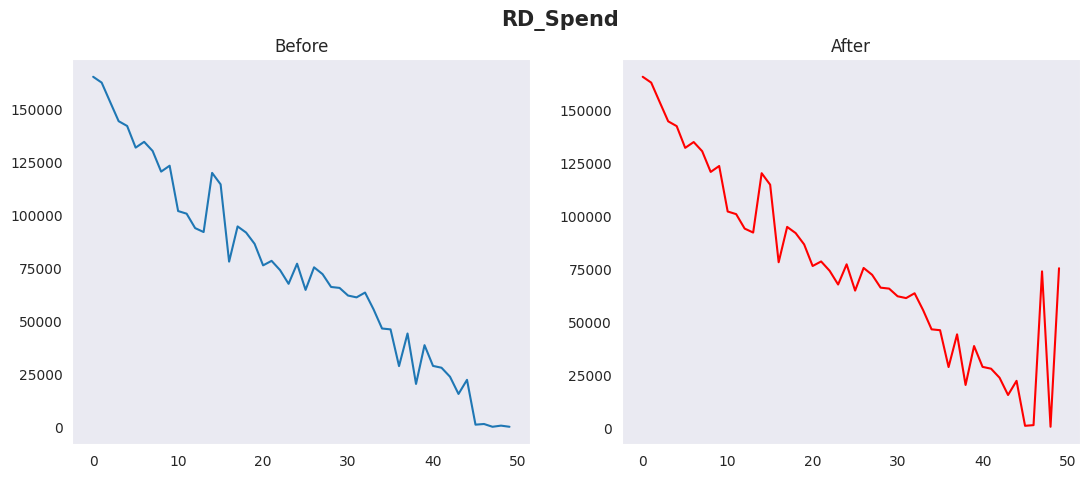

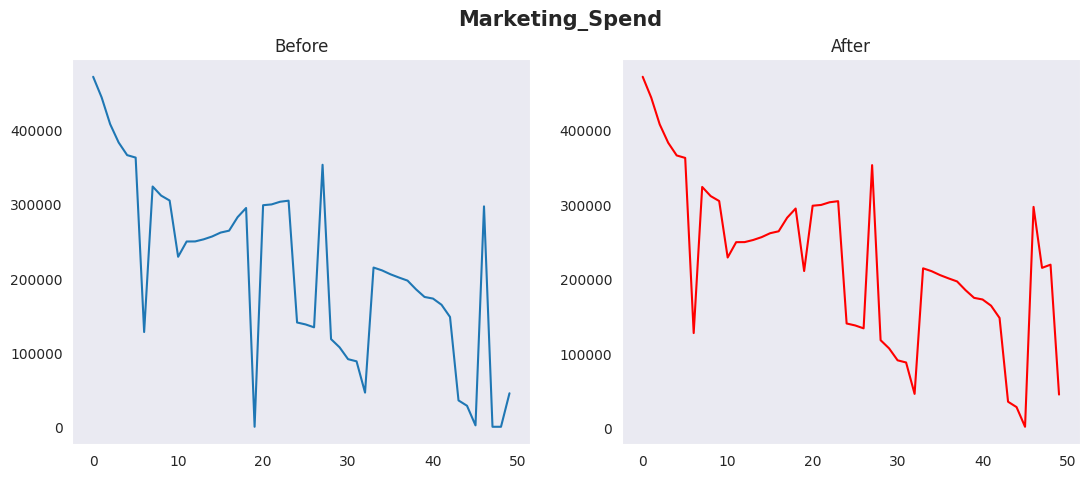

In [23]:
df=data.copy()
for i in df[df.RD_Spend==0].index:
    df.RD_Spend.iloc[i]=df.RD_Spend.mean()
for i in df[df.Marketing_Spend==0].index:
    df.Marketing_Spend.iloc[i]=df.Marketing_Spend.mean()
for i in ['RD_Spend','Marketing_Spend']:
    plt.subplots(1,2,figsize=(13,5))
    plt.suptitle(i,fontweight='bold',fontsize=15)
    plt.subplot(1,2,1)
    plt.title("Before")
    data[i].plot()
    plt.subplot(1,2,2)
    plt.title("After")
    df[i].plot(color="red")
mean_imputed_df=df

## **3) Replacing zeroes with mean of neighbouring data point**



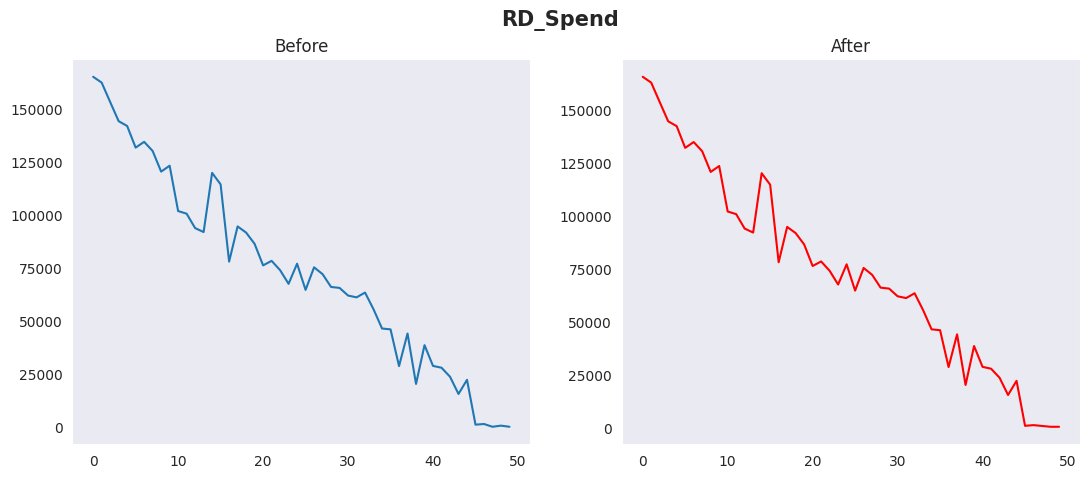

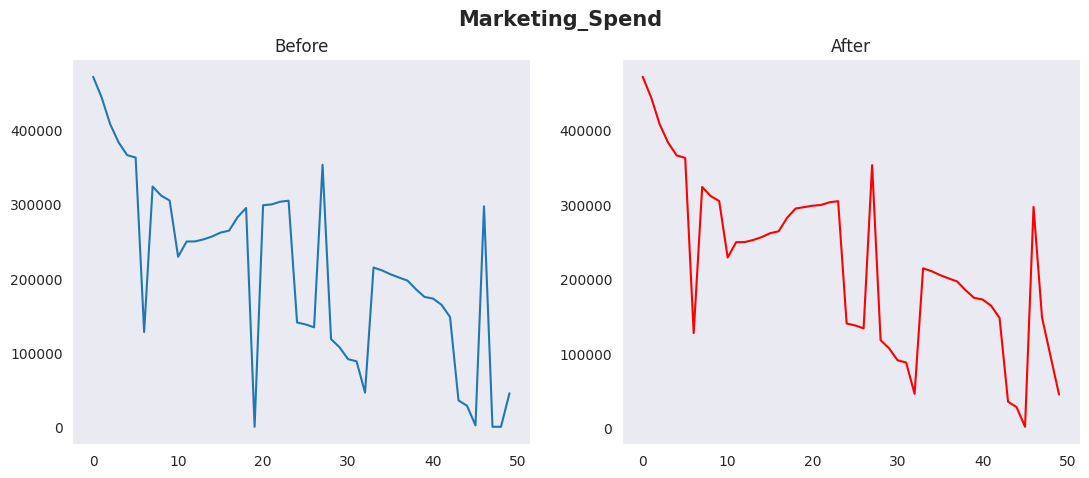

In [24]:
df=data.copy()
for i in df[df.RD_Spend==0].index:
    if i ==49:
        df.RD_Spend.iloc[i]=df.RD_Spend.iloc[i-1]
    else:
        df.RD_Spend.iloc[i]=np.mean([df.RD_Spend.iloc[i-1],df.RD_Spend.iloc[i+1]])
for i in df[df.Marketing_Spend==0].index:
    if i == 49:
        df.Marketing_Spend.iloc[i]=df.Marketing_Spend.iloc[i-1]
    else:
        df.Marketing_Spend.iloc[i]=np.mean([df.Marketing_Spend.iloc[i-1],df.Marketing_Spend.iloc[i+1]])
for i in ['RD_Spend','Marketing_Spend']:
    plt.subplots(1,2,figsize=(13,5))
    plt.suptitle(i,fontweight='bold',fontsize=15)
    plt.subplot(1,2,1)
    plt.title("Before")
    data[i].plot()
    plt.subplot(1,2,2)
    plt.title("After")
    df[i].plot(color="red")
mean_imputed_df2=df

## **4) Droping zeroes**



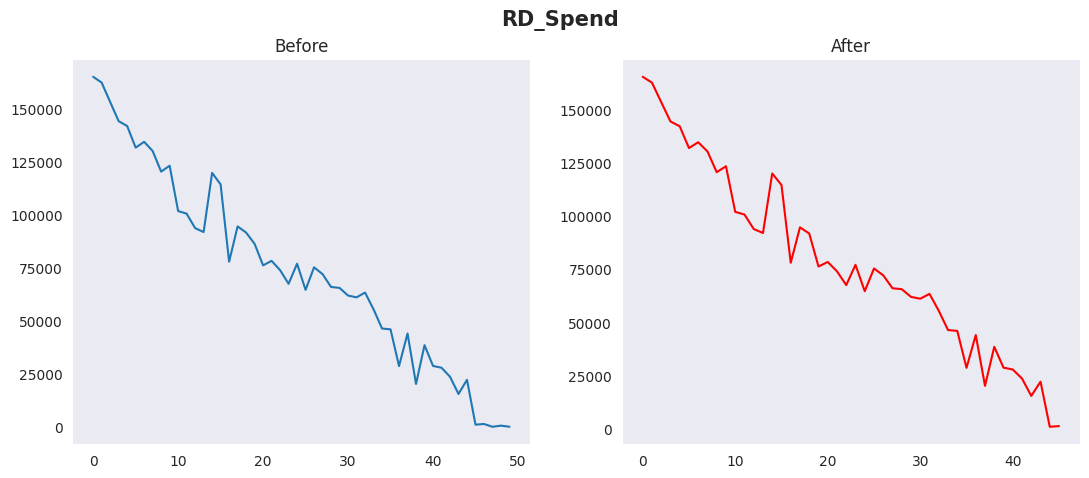

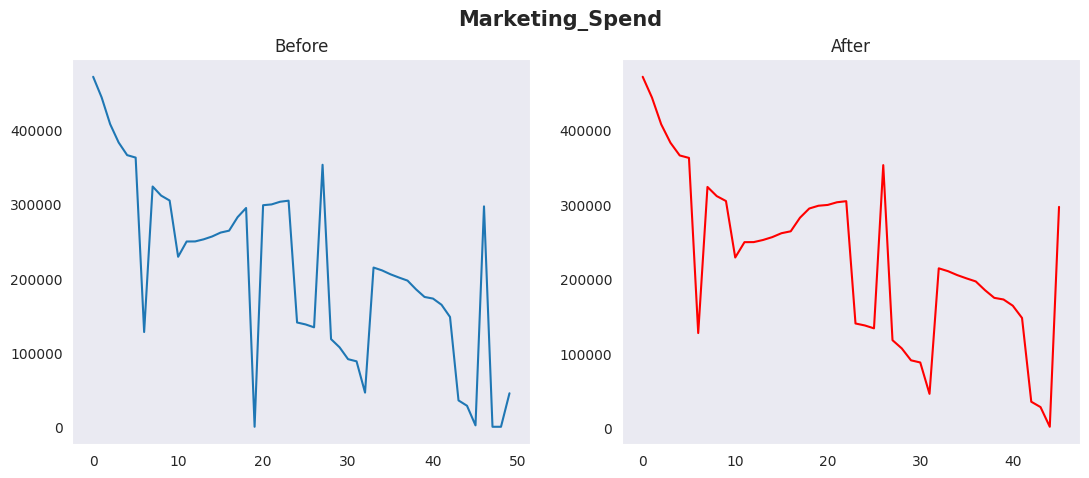

In [25]:
x=data[(data==0).any(axis=1)].index
df=data.drop(x,axis=0).reset_index(drop=True)
for i in ['RD_Spend','Marketing_Spend']:
    plt.subplots(1,2,figsize=(13,5))
    plt.suptitle(i,fontweight='bold',fontsize=15)
    plt.subplot(1,2,1)
    plt.title("Before")
    data[i].plot()
    plt.subplot(1,2,2)
    plt.title("After")
    df[i].plot(color="red")
dropped_df=df

------------


# **Building Models**



In [100]:
def report(mdl,x=None):
    r2=mdl.rsquared
    adj=mdl.rsquared_adj
    rmse=np.sqrt(mdl.mse_resid)
    if x==None:
        print(f"Rsquare value : {r2}\nAdj rsquare : {adj}\nRmse : {rmse}")
    else :
        return r2,adj,rmse


# **Model 1**

In [101]:
raw_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=data).fit()
raw_model.summary()
report(raw_model)

Rsquare value : 0.9507524843355148
Adj rsquare : 0.945156175737278
Rmse : 9439.206973144566


### New Model with only numerical features

In [103]:
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=data).fit()
model.summary()
report(model)

Rsquare value : 0.9507459940683246
Adj rsquare : 0.9475337762901719
Rmse : 9232.334837002692


##   *** Conclusion**



#### Removing state feature doesnt affect the model and also helped to reduce rmse.

## Comparison of model based on handling zeroes

In [104]:
comp_df=pd.DataFrame(columns=["No.","Data Used",'Rsquare','Adj_Rsquare','Rmse'])

# raw model
r2,ad,rms=report(raw_model,"r")
comp_df.loc[len(comp_df.index)]=["Model 1","raw data",r2,ad,rms]

# model medain imputation
median_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=median_imputed_df).fit()
r2,ad,rms=report(median_model,"r")
comp_df.loc[len(comp_df.index)]=["Model 2","median imputation",r2,ad,rms]

# model after mean imputation
mean_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=mean_imputed_df).fit()
r2,ad,rms=report(mean_model,"r")
comp_df.loc[len(comp_df.index)]=["Model 3","mean imputation",r2,ad,rms]

#model after mean imputing adjacent neighbour
adjacent_mean_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=mean_imputed_df2).fit()
r2,ad,rms=report(adjacent_mean_model,"r")
comp_df.loc[len(comp_df.index)]=["Model 4","mean imputation of adjacent neighbour",r2,ad,rms]

#model after dropping zeroes
model_1=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=dropped_df).fit()
r2,ad,rms=report(model_1,"r")
comp_df.loc[len(comp_df.index)]=["Model 5","dropping zeroes",r2,ad,rms]
comp_df

,No.,Data Used,Rsquare,Adj_Rsquare,Rmse
0,Model 1,raw data,0.950752,0.945156,9439.206973
1,Model 2,median imputation,0.807920,0.795393,18231.906260
2,Model 3,mean imputation,0.804283,0.791519,18403.692472
3,Model 4,mean imputation of adjacent neighbour,0.949381,0.946080,9359.347001
4,Model 5,dropping zeroes,0.960823,0.958025,7367.428276


## conclusion


*  Performance of model decreases after median and mean imputation.
*  Dropping zeroes increase model performance.
* mean imputing adjacent datapoints also have good performance on model



# **Model 2   (Log Model)**


### **Model after median imputation**

In [105]:
log_df=np.log(median_imputed_df[numerical])
log_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=log_df).fit()
report(log_model)

Rsquare value : 0.43747163026761116
Adj rsquare : 0.4007849974589771
Rmse : 0.358516968942032


### **Model after mean imputation**

In [32]:
log_df=np.log(mean_imputed_df[numerical])
log_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=log_df).fit()
report(log_model)

Rsquare value : 0.4355251315057672
Adj rsquare : 0.3987115531257085
Rmse : 0.35913671563078675


### **Model after mean imputation with neighbouring data**

In [106]:
log_df=np.log(mean_imputed_df2[numerical])
log_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=log_df).fit()
report(log_model)

Rsquare value : 0.8307012289719169
Adj rsquare : 0.8196600047744332
Rmse : 0.1966819039880332


### **Model after dropping zeroes**

In [34]:
log_df=np.log(dropped_df[numerical])
log_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=log_df).fit()
log_model.summary()
report(log_model)

Rsquare value : 0.7376373888816574
Adj rsquare : 0.7188972023732043
Rmse : 0.16728550037303802


## -->  Conclusion

*   Log transformation of data decreases model performance


---




# **Model 3 (square root transf**ormation)

In [107]:
#raw data
sqrt_df=np.sqrt(data[numerical])
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=sqrt_df).fit()
report(model)

Rsquare value : 0.9305435277653865
Adj rsquare : 0.9260137578370422
Rmse : 17.647320674490235


In [36]:
# model after median imputation
sqrt_df=np.sqrt(median_imputed_df[numerical])
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=sqrt_df).fit()
report(model)

Rsquare value : 0.6813048115569893
Adj rsquare : 0.6605203427454887
Rmse : 37.801598944523526


In [37]:
#model after mean imputation
sqrt_df=np.sqrt(mean_imputed_df[numerical])
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=sqrt_df).fit()
report(model)

Rsquare value : 0.6777572508414624
Adj rsquare : 0.6567414193746013
Rmse : 38.01141123739723


In [38]:
# odel after mean imputation of adjacent neighbours
sqrt_df=np.sqrt(mean_imputed_df2[numerical])
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=sqrt_df).fit()
report(model)

Rsquare value : 0.9273414345590774
Adj rsquare : 0.9226028324651041
Rmse : 18.04952703691317


In [126]:
#model after zero dr0pping
sqrt_df=np.sqrt(dropped_df[numerical])
sqrt_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=sqrt_df).fit()
*a,b=report(sqrt_model,1)
np.square(b)

225.0673984081697

## Conclusion

*   square root model is better than log transformed model
*   But less performance than raw model


---





# **Model 4  (cube root transformation)**

In [109]:
#raw data
cbrt_df=np.cbrt(data[numerical])
cbrt_model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=cbrt_df).fit()
cbrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           6.92e-24
Time:                        15:29:32   Log-Likelihood:                -104.42
No. Observations:                  50   AIC:                             216.8
Df Residuals:                      46   BIC:                             224.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.7715      3.645      8.168      0.000      22.434      37.109
RD_Spend            0.4664      0.031     14.958      0.000       0.404       0.529
Administration     -0.0056      0.074     -0.075      0.941      -0.155       0.144
Marketing_Spend    -0.0008      0.021     -0.038      0.970      -0.044       0.042
==============================================================================
Omnibus:                        9.919   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.166
Skew:                           0.808   Prob(JB):                      0.00620
Kurtosis:                       4.507   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
report(cbrt_model)

Rsquare value : 0.9084339910622685
Adj rsquare : 0.9024622948271991
Rmse : 2.0364747808961354


## Transforming categorical variable (Label encoding)

In [112]:
#splitting data into x and y
x=data.iloc[:,:-2]
y=data.iloc[:,-1]

In [113]:
# removing categorical state and adding new label encoded state feature
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data[categorical])
new_state=le.transform(data[categorical])
x["new_state"]=new_state
x.head()

,RD_Spend,Administration,Marketing_Spend,new_state
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [114]:
#creating model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
print(f"Rsquare value : {r2_score(y,y_pred)}")
print(f"Rmse : {np.sqrt(mean_squared_error(y,y_pred))}")

Rsquare value : 0.9507462044842656
Rmse : 8855.325573724913


### State fetaure have no impact on the model
### drop State feature

# Standard scaling the model

In [127]:
x=dropped_df.iloc[:,:-2]
y=np.array(dropped_df.iloc[:,-1]).reshape(-1,1)

In [142]:
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler().fit(x)
y_scaler=StandardScaler().fit(y)
x_scaled=x_scaler.transform(x)
y_scaled=y_scaler.transform(y)

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
scaled_model= LinearRegression()
scaled_model.fit(x_scaled,y_scaled)
y_predict=scaled_model.predict(x_scaled)
y_predict_unscaled=y_scaler.inverse_transform(y_predict)
rms=np.sqrt(mse(y,y_predict_unscaled))
r2=r2_score(y,y_predict_unscaled)
print('Rsquare : ',r2,'Rmse : ',rms)

Rsquare :  0.9608231830180131 Rmse :  7039.821476185426


In [166]:
models=[raw_model,median_model,mean_model,adjacent_mean_model,model_1,log_model,sqrt_model,cbrt_model,scaled_model]
final=pd.DataFrame(columns=["Model",'Rsquared','Adj_Rsquared','Rmse'])
model_names=['Raw model','Median Imputed model','Mean Imputed model','Neighbour mean imputed model','Dropped model','Log model','Square root model','Cube root model','Standard scaled model']
for j,i in enumerate(models[:-1]):
    r,a,rmse=report(i,1)
    final.loc[len(final)]=[model_names[j],r,a,rmse]
final.loc[len(final)]=[model_names[-1],r2,r2,rms]



In [167]:
final

,Model,Rsquared,Adj_Rsquared,Rmse
0,Raw model,0.950752,0.945156,9439.206973
1,Median Imputed model,0.807920,0.795393,18231.906260
2,Mean Imputed model,0.804283,0.791519,18403.692472
3,Neighbour mean imputed model,0.949381,0.946080,9359.347001
4,Dropped model,0.960823,0.958025,7367.428276
5,Log model,0.830701,0.819660,0.196682
6,Square root model,0.923797,0.918353,15.002246
7,Cube root model,0.908434,0.902462,2.036475
8,Standard scaled model,0.960823,0.960823,7039.821476


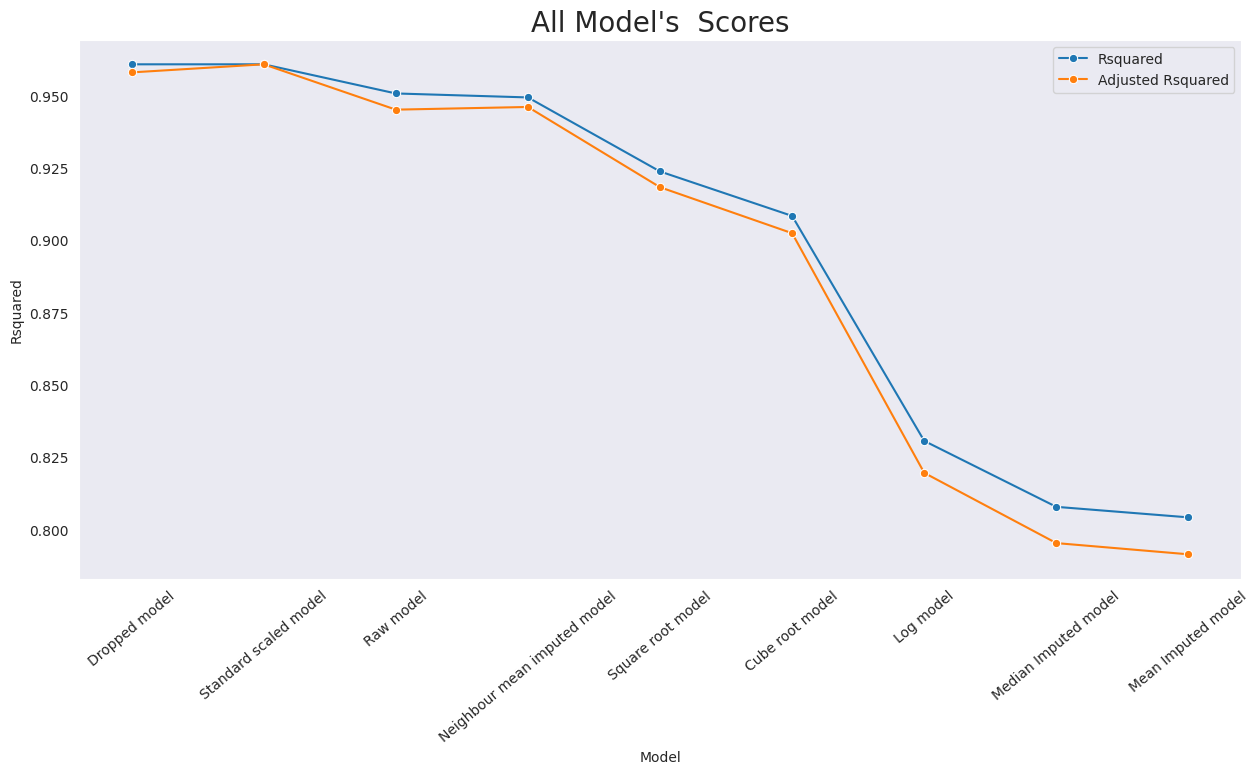

In [204]:
fig=plt.figure(figsize=(15,7))
plt.title("All Model's  Scores",size=20)
df=final.sort_values(by='Rsquared',ascending=False)
sns.lineplot(data=df,marker='o',y='Rsquared',x='Model',label="Rsquared")
sns.lineplot(data=df,marker='o',y='Adj_Rsquared',x='Model',label="Adjusted Rsquared")
plt.xticks(rotation=40);
#plt.tight_layout()

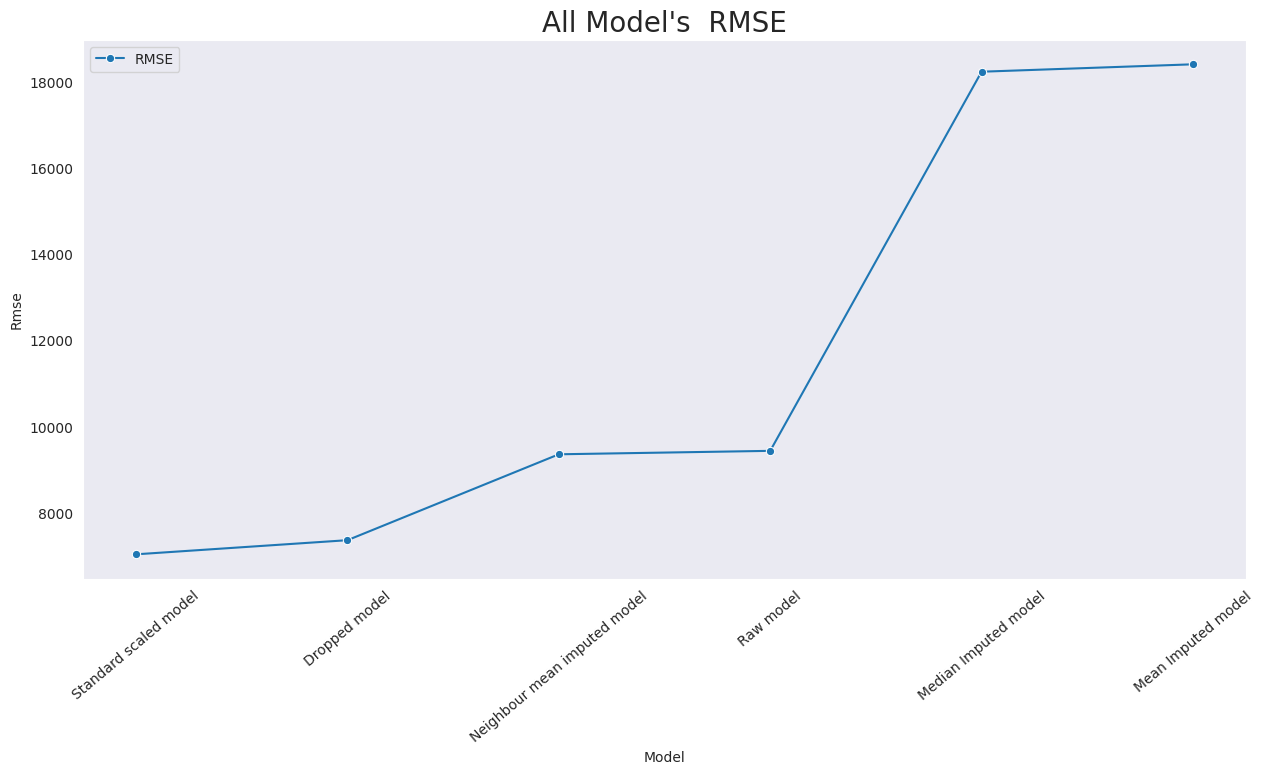

In [218]:
fig=plt.figure(figsize=(15,7))
plt.title("All Model's  RMSE",size=20)
df=final.sort_values(by='Rmse')[3:]
sns.lineplot(data=df,marker='o',y='Rmse',x='Model',label="RMSE")
plt.xticks(rotation=40);
#plt.tight_layout()

In [ ]:
# # Best 2 models are :
#  1) Standard scaled model
#  2) dropped model

In [231]:
# final model prediction
pd.DataFrame({'Actual':y.ravel(),'predicted':y_predict_unscaled.ravel()})

,Actual,predicted
0,192261.83,188542.823063
1,191792.06,184994.626784
2,191050.39,180214.907913
3,182901.99,171634.173491
4,166187.94,171190.591259
5,156991.12,162668.811661
6,156122.51,157412.092739
7,155752.60,157935.135917
8,152211.77,149925.426072
9,149759.96,154381.594935




---



---



---

